In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import pandas as pd
import numpy as np

In [3]:
ped_df = pd.read_csv("comp_pheno.ped", sep='\t')

In [4]:
len(ped_df)

191

In [5]:
ped_df.head()

,familyId,personId,dadId,momId,sex,status,role
0,f1,f1.mom,0,0,2,1,mom
1,f1,f1.dad,0,0,1,1,dad
2,f1,f1.p1,f1.dad,f1.mom,1,2,prb
3,f1,f1.s1,f1.dad,f1.mom,2,2,sib
4,f2,f2.mom,0,0,2,1,mom


## Age at assesment

In [6]:
40*12

480

In [7]:
5*12

60

In [8]:
12*12

144

In [9]:
3*12

36

In [10]:
i1_age = pd.Series(np.random.normal(480, 60, len(ped_df)), index=ped_df.index)

In [11]:
index = (ped_df.role == 'prb') | (ped_df.role == 'sib')

In [12]:
i1_age[index] = np.random.normal(144, 36, len(ped_df[index]))

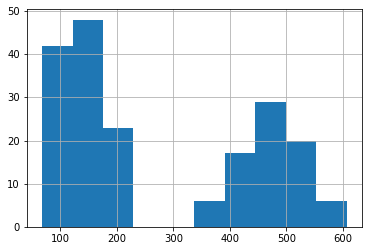

In [13]:
i1_age.hist()

In [14]:
i1_age.min()

68.00148724003327

In [15]:
i1_age.max()

606.2292731817272

In [16]:
603/12

50.25

## IQ

In [17]:
i1_iq = pd.Series(np.random.normal(100, 30, len(ped_df)), index=ped_df.index)

In [18]:
index = ped_df.status == 2

In [19]:
i1_iq[index] = np.random.normal(70, 40, len(ped_df[index]))

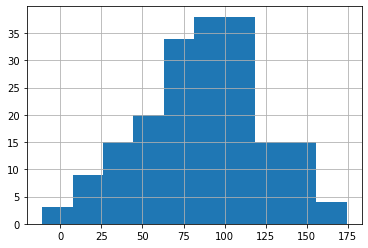

In [20]:
i1_iq.hist()

## Other measures

In [21]:
i1_m1 = pd.Series(np.random.normal(80,20, len(ped_df)), ped_df.index)

In [22]:
i1_m1.head()

0     52.812836
1     30.170697
2    110.711131
3     89.986485
4     54.140552
dtype: float64

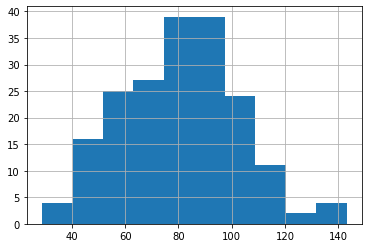

In [23]:
i1_m1.hist()

In [24]:
i1_m2 = pd.Series(np.random.normal(40,10, len(ped_df)), ped_df.index)

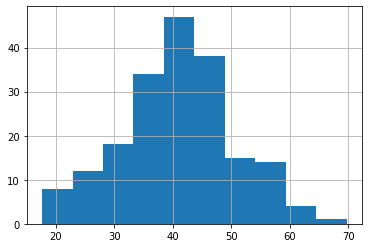

In [25]:
i1_m2.hist()

In [26]:
i1_m3 = pd.Series(np.random.normal(80,20, len(ped_df)), ped_df.index)

In [27]:
index = ped_df.status==2
len(index)

191

In [28]:
len(ped_df[index])

68

In [29]:
i1_m3[index] = np.random.normal(40, 5, len(ped_df[index]))

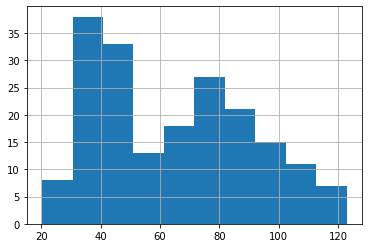

In [30]:
i1_m3.hist()

In [31]:
i1_m4 = pd.Series(np.random.poisson(2, len(ped_df)), index=ped_df.index)

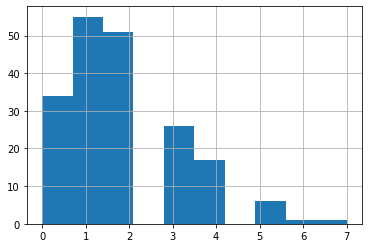

In [32]:
i1_m4.hist()

In [33]:
i1_m4 = pd.Series(np.random.poisson(4, len(ped_df)), index=ped_df.index)
i1_m4[index] = np.random.poisson(1,len(ped_df[index]))

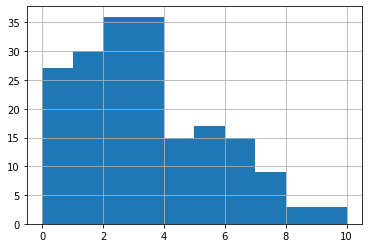

In [34]:
i1_m4.hist()

In [35]:
categorical_values = ["val1", "val2", "val3", "val4", "val5"]
i1_m5 = pd.Series(np.random.choice(categorical_values, len(ped_df)), index=ped_df.index)

In [36]:
i1_m5

0      val3
1      val5
2      val3
3      val2
4      val3
       ... 
186    val5
187    val2
188    val2
189    val2
190    val2
Length: 191, dtype: object

## Full instrument

In [37]:
i1_df = pd.DataFrame(index=ped_df.index)

In [38]:
i1_df['personId'] = ped_df['personId']

In [39]:
i1_df['age'] = i1_age
i1_df['iq'] = i1_iq
i1_df['m1'] = i1_m1
i1_df['m2'] = i1_m2
i1_df['m3'] = i1_m3
i1_df['m4'] = i1_m4
i1_df['m5'] = i1_m5

In [40]:
i1_df.head()

,personId,age,iq,m1,m2,m3,m4,m5
0,f1.mom,495.851016,97.504324,52.812836,30.027701,71.375773,7,val3
1,f1.dad,455.741509,95.692098,30.170697,46.091071,80.809181,6,val5
2,f1.p1,166.339756,104.911892,110.711131,28.525899,35.917635,0,val3
3,f1.s1,171.751713,38.666057,89.986485,45.483645,36.402945,1,val2
4,f2.mom,538.980455,77.218199,54.140552,46.634515,57.885493,5,val3


In [41]:
i1_df.to_csv("instruments/i1.csv", index=False)